<a href="https://colab.research.google.com/github/cxinu/ML-Models/blob/main/GradientBoostingRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
california_file_path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(california_file_path)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


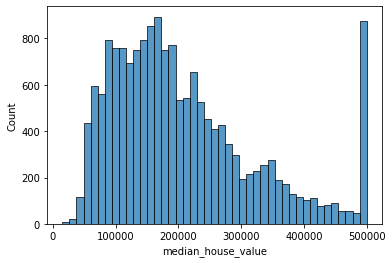

In [ ]:
sns.histplot(df['median_house_value'])

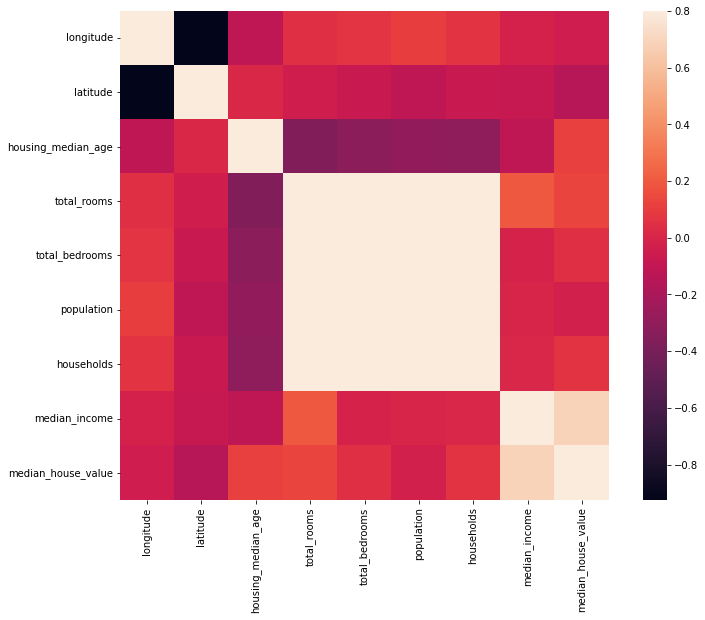

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df.median_house_value
X = df.drop(['median_house_value'], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13600, 8), (3400, 8), (13600,), (3400,))

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=3000, random_state=1)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8988310990930048, 0.8303919334305871)

In [ ]:
df_val = pd.DataFrame({'actual_value': y_test, 'predicted_value': model.predict(X_test)})
df_val

,actual_value,predicted_value
9056,50700.0,73321.400281
6685,300000.0,214858.927218
15096,281100.0,236257.099432
16881,76800.0,73690.107265
1533,260700.0,268263.200545
...,...,...
15774,500001.0,466897.962776
9108,82500.0,88199.329496
117,62800.0,70807.681076
2449,159800.0,151945.537067


In [ ]:
import pickle
with open('HistGradModel.pickle', 'wb') as f:
  pickle.dump(model, f)
f.close()